In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
sns.set(font_scale=2)

In [12]:
import numpy as np

In [13]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)

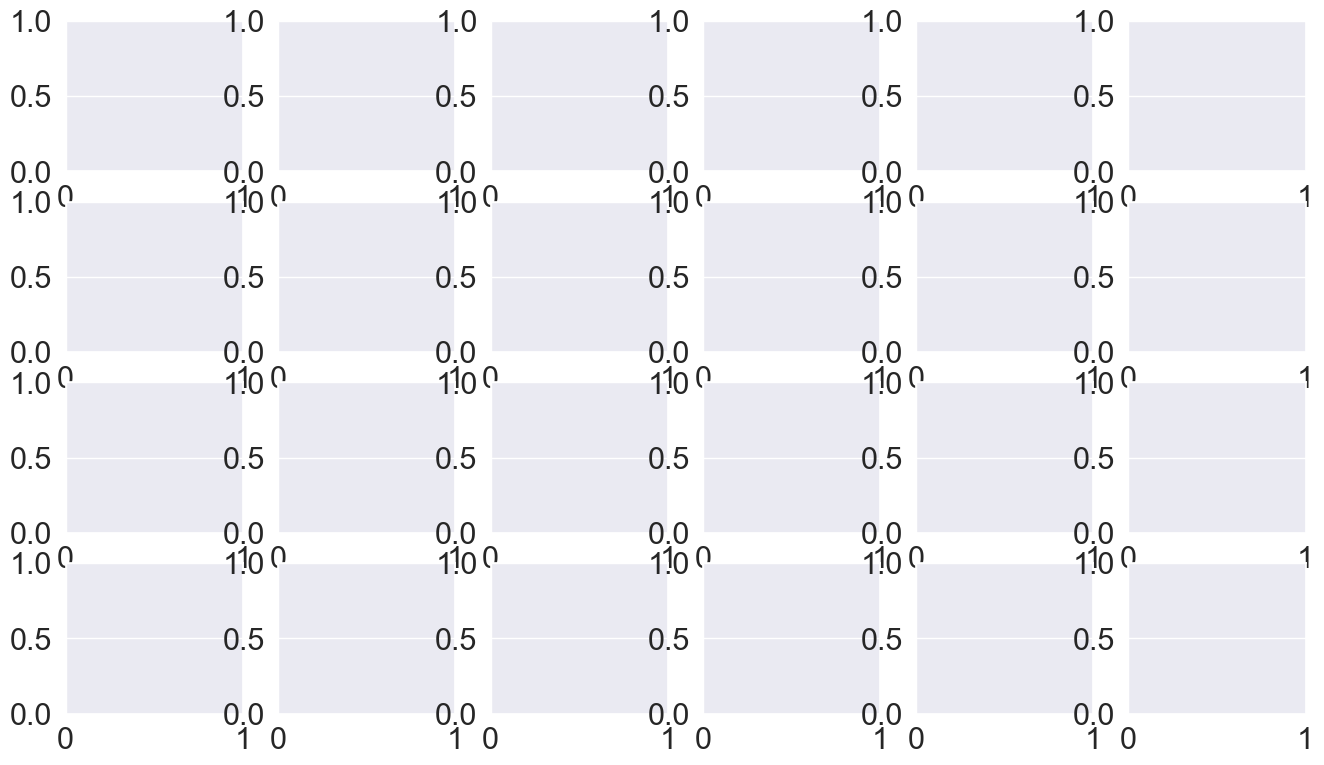

In [14]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))

In [15]:
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap='gray')
    # axes.set_xticks([])  remove x-axis tick marks
    # axes.set_yticks([])  remove y-axis tick marks
    axes.axis('off')
    axes.set_title(target)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
X_test.reshape((10000, 28, 28, 1))

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
X_train = X_train.astype('float32') / 255

In [21]:
X_test = X_test.astype('float32') / 255

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train = to_categorical(y_train)

In [24]:
y_train.shape

(60000, 10)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
y_test = to_categorical(y_test)

In [27]:
y_test.shape

(10000, 10)

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
cnn = Sequential()

In [30]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [31]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

In [32]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [33]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [34]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [35]:
cnn.add(Flatten())

In [36]:
cnn.add(Dense(units=128, activation='relu'))

In [37]:
cnn.add(Dense(units=10, activation='softmax'))

In [38]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

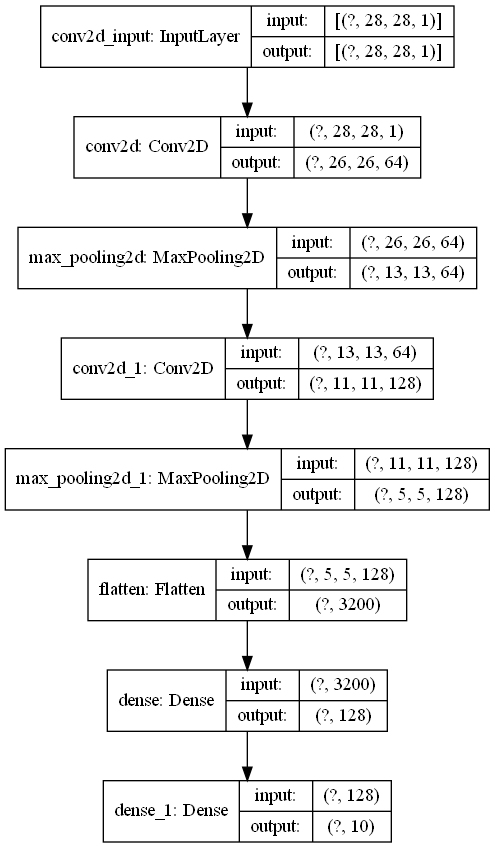

In [39]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

In [40]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import TensorBoard
import time

tensorboard_callback = TensorBoard(log_dir=f'./logs/mnist{time.time()}',
    histogram_freq=1, write_graph=True)

In [42]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64,
        validation_split=0.1, callbacks=[tensorboard_callback])

Epoch 1/10
  1/844 [..............................] - ETA: 0s - loss: 2.3099 - accuracy: 0.0469WARNING:tensorflow:From C:\Users\Insaf\anaconda3\envs\tf_gpu_env\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
844/844 [==============================] - 19s 23ms/step - loss: 0.1435 - accuracy: 0.9568 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 2/10
844/844 [==============================] - 19s 23ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 3/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0386 - val_accuracy: 0.9880
Epoch 4/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0381 - val_accuracy: 0.9882
Epoch 5/10
844/844 [======================

In [43]:
X_test = np.expand_dims(X_test, axis=-1)

In [44]:
y_test = np.expand_dims(y_test, axis=-1)

In [45]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0295 - accuracy: 0.9922


In [46]:
predictions = cnn.predict(X_test)

In [47]:
y_test[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [48]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 0.0000000012%
2: 0.0000000094%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000000%
9: 0.0000000004%


In [49]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [50]:
len(incorrect_predictions)

78

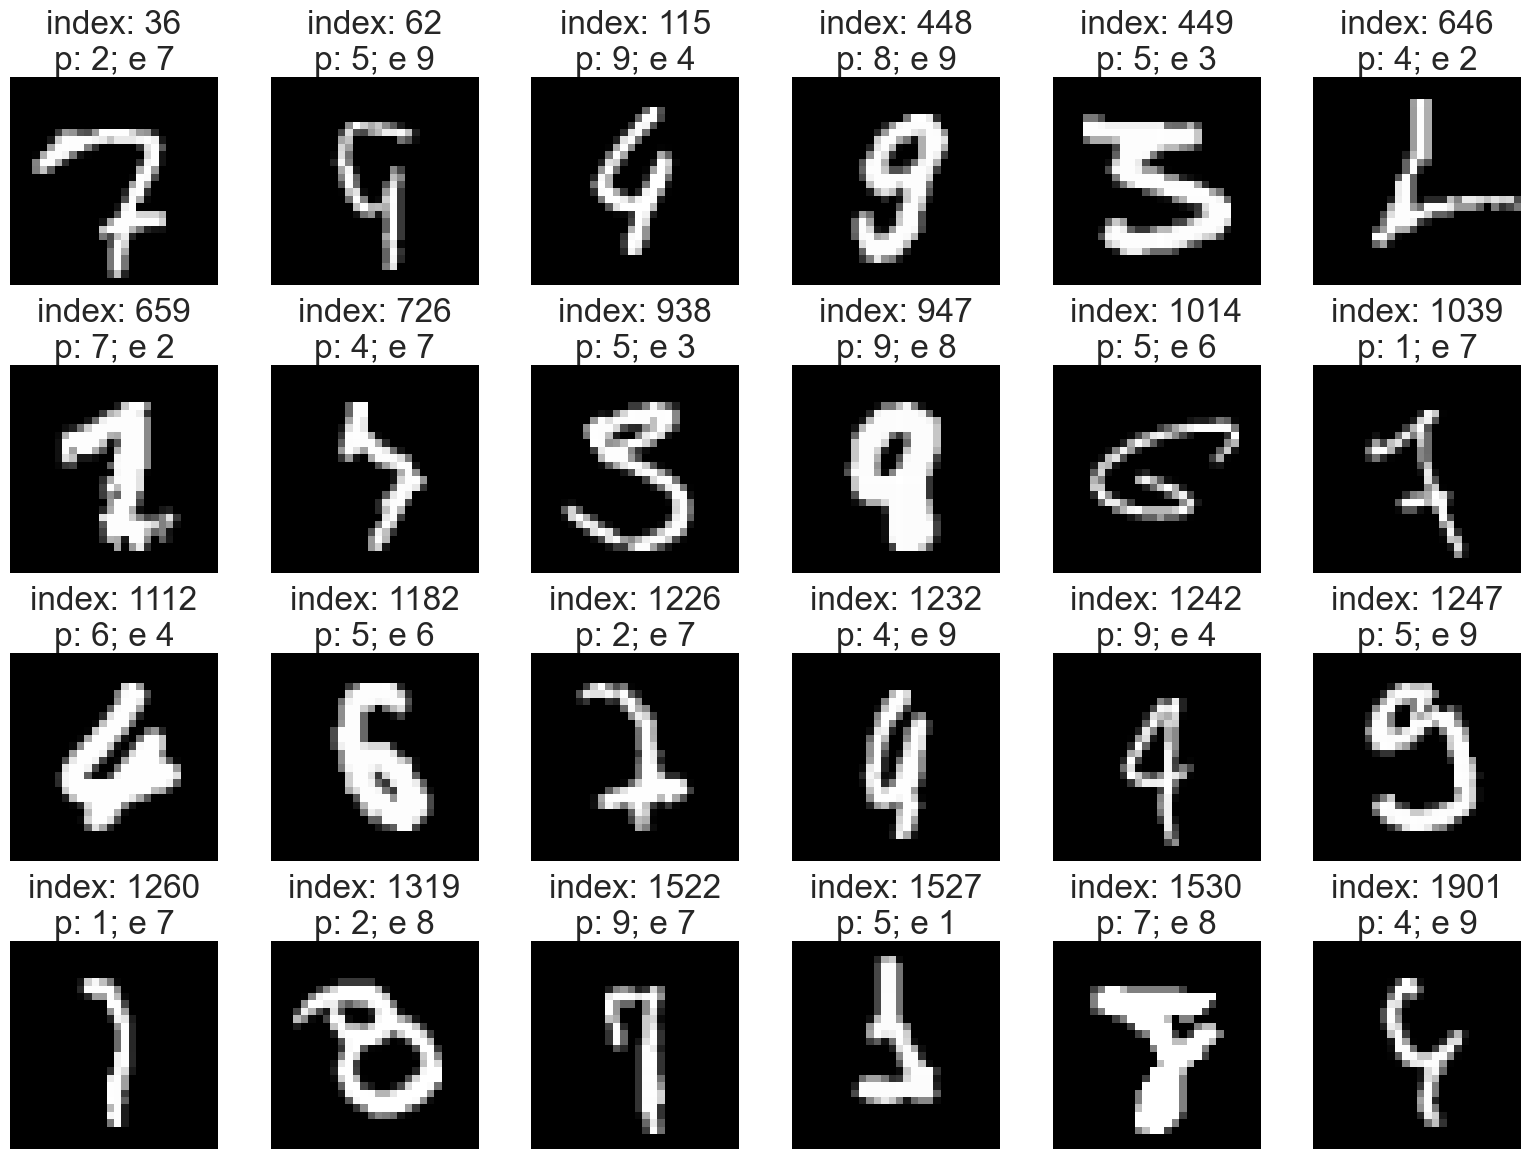

In [51]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap='gray')
    axes.axis('off')
    axes.set_title(
        f'index: {index}\np: {predicted}; e {expected}')
plt.tight_layout()

In [52]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [53]:
display_probabilities(predictions[726])

0: 0.0000011777%
1: 0.0043003649%
2: 0.0009653458%
3: 0.0000467755%
4: 60.4663133621%
5: 0.2662360435%
6: 0.0016233007%
7: 39.1049355268%
8: 0.0003522429%
9: 0.1552244998%


In [54]:
display_probabilities(predictions[1527])

0: 0.0000000001%
1: 7.7131472528%
2: 0.0000055747%
3: 0.0796805834%
4: 0.0088906520%
5: 92.1981990337%
6: 0.0000391840%
7: 0.0000000119%
8: 0.0000250184%
9: 0.0000117421%


In [55]:
display_probabilities(predictions[1790])

0: 0.0058953305%
1: 0.0000010614%
2: 99.9464094639%
3: 0.0419017655%
4: 0.0000001651%
5: 0.0000003603%
6: 0.0000000200%
7: 0.0053372954%
8: 0.0004482393%
9: 0.0000007805%


In [56]:
display_probabilities(predictions[924])

0: 0.0000000211%
1: 0.0000017398%
2: 76.5201032162%
3: 0.0000602888%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 23.4798297286%
8: 0.0000000064%
9: 0.0000000000%


In [57]:
cnn.save('mnist_cnn.h5')